<a href="https://colab.research.google.com/github/diegomendes1/PSO-Pixels/blob/main/GA_Caixeiro_Viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diego Mendes da Silva

Computação Natural - Prof. Carmelo Filho

**Algoritmo Genético: Caixeiro Viajante**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator

# Classes

In [ ]:
class Cidade:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distParaCidade(self, outraCidade):
        dX = abs(self.x - outraCidade.x)
        dY = abs(self.y - outraCidade.y)
        return np.sqrt((dX * dY) + (dY * dY))

class Fitness:
    def __init__(self, caminho):
        self.caminho = caminho
        self.distancia = 0
        self.fitness= 0.0
    
    def calcularDistancia(self):
        if self.distancia == 0:
            for i in range(0, len(self.caminho)):
                origem = self.caminho[i]
                destino = None
                if i + 1 < len(self.caminho):
                    destino = self.caminho[i + 1]
                else:
                    destino = self.caminho[0]
                self.distancia += origem.distParaCidade(destino)
        return self.distancia
    
    def calcularFitness(self):
        self.fitness = 1 / float(self.calcularDistancia())
        return self.fitness

# População

In [ ]:
def gerarPopulacaoAleatoria(tamanho, cidades):
    populacao = []
    for i in range(0, tamanho):
        populacao.append(random.sample(cidades, len(cidades)))
    return populacao

In [ ]:
def gerarProximaGeracao(gAtual, qtdElite, taxaMutacao):
    resultado = selecionarCaminhos(avaliarCaminhos(gAtual), qtdElite)

    pais = gerarPais(gAtual, resultado)
    filhos = cruzamentoPopulacao(pais, qtdElite)

    return mutacaoPopulacao(filhos, taxaMutacao)

# Fitness e Seleção

In [ ]:
def selecionarCaminhos(populacao, qtdElite):
    resultado = []
    df = pd.DataFrame(np.array(populacao), columns=["id","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, qtdElite):
        resultado.append(populacao[i][0])
    for i in range(0, len(populacao) - qtdElite):
        escolha = 100*random.random()
        for i in range(0, len(populacao)):
            if escolha <= df.iat[i,3]:
                resultado.append(populacao[i][0])
                break
    return resultado

def avaliarCaminhos(populacao):
    resultado = {}
    for i in range(0,len(populacao)):
        resultado[i] = Fitness(populacao[i]).calcularFitness()
    return sorted(resultado.items(), key = operator.itemgetter(1), reverse = True)

def gerarPais(populacao, selecao):
    pais = []
    for i in range(0, len(selecao)):
        index = selecao[i]
        pais.append(populacao[index])
    return pais

# Cruzamento e Mutação

In [ ]:
def fazerCruzamento(pai1, pai2):
    resultado = []
    filho1 = []
    filho2 = []
    
    geneA = int(random.random() * len(pai1))
    geneB = int(random.random() * len(pai2))
    
    iniGene = min(geneA, geneB)
    fimGene = max(geneA, geneB)

    for i in range(iniGene, fimGene):
        filho1.append(pai1[i])
        
    filho2 = [i for i in pai2 if i not in filho1]

    resultado = filho1 + filho2
    return resultado

def cruzamentoPopulacao(pais, qtdElite):
    filhos = []
    tam = len(pais) - qtdElite
    listaPaisAleatoria = random.sample(pais, len(pais))

    for i in range(0,qtdElite):
        filhos.append(pais[i])
    
    for i in range(0, tam):
        child = fazerCruzamento(listaPaisAleatoria[i], listaPaisAleatoria[len(pais)-i-1])
        filhos.append(child)
    return filhos

In [ ]:
def fazerMutacao(caminho, taxa):
    for cTrocada in range(len(caminho)):
        if(random.random() < taxa):
            cTrocadaDestino = int(random.random() * len(caminho))
            
            cidade1 = caminho[cTrocada]
            cidade2 = caminho[cTrocadaDestino]
            
            caminho[cTrocada] = cidade2
            caminho[cTrocadaDestino] = cidade1
    return caminho

def mutacaoPopulacao(populacao, taxa):
    mutacao = []
    
    for ind in range(0, len(populacao)):
        idAtual = fazerMutacao(populacao[ind], taxa)
        mutacao.append(idAtual)
    return mutacao

# Resultados

In [ ]:
cidades = []

for i in range(0,25):
    cidades.append(Cidade(x=int(random.random() * 200), y=int(random.random() * 200)))

populacaoInicial = gerarPopulacaoAleatoria(100, cidades)

In [ ]:
def algoritmoGenetico(qtdGeracoes, taxaMutacao, qtdElite):
    pop = populacaoInicial #pode se utilizar diretamente a função de geração da população.
    
    for i in range(0, qtdGeracoes):
        pop = gerarProximaGeracao(pop, qtdElite, taxaMutacao)
    
    idMelhor = avaliarCaminhos(pop)[0][0]
    return pop[idMelhor]

# Teste 1 - Taxa de Mutação

In [ ]:
print("Distância com a População Inicial: " + str((int)(1 / avaliarCaminhos(populacaoInicial)[0][1])) + "m")
testesMutacao = []
taxasMutacao = []

for i in range(1, 10):
    pop = algoritmoGenetico(qtdGeracoes=500, taxaMutacao=0.1/(2*i), qtdElite=10)
    testesMutacao.append(Fitness(pop).calcularDistancia())
    taxasMutacao.append(0.1/(2*i))

pop0 = algoritmoGenetico(qtdGeracoes=500, taxaMutacao=0, qtdElite=10)
testesMutacao.append(Fitness(pop0).calcularDistancia())
taxasMutacao.append(0)

Distância com a População Inicial: 1808m


In [ ]:
idMelhor = testesMutacao.index(min(testesMutacao))
print("Melhor Taxa de Mutação: " + str(taxasMutacao[idMelhor]))
print("Melhor Distância: " + str(min(testesMutacao)))

Melhor Taxa de Mutação: 0.01
Melhor Distância: 583.9185944530958


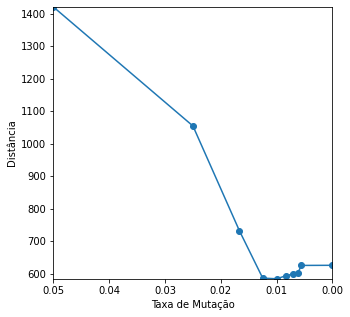

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(taxasMutacao, testesMutacao, 'o-')
plt.xlim(max(taxasMutacao), min(taxasMutacao))
plt.ylim(min(testesMutacao), max(testesMutacao))
plt.xlabel('Taxa de Mutação')
plt.ylabel('Distância')
plt.show()

# Teste 2 - Elitismo

In [ ]:
print("Distância com a População Inicial: " + str((int)(1 / avaliarCaminhos(populacaoInicial)[0][1])) + "m")
testesElitismo = []
taxasElitismo = []

for i in range(0, 11):
    pop = algoritmoGenetico(qtdGeracoes=500, taxaMutacao=0.01, qtdElite=i*2)
    testesElitismo.append(Fitness(pop).calcularDistancia())
    taxasElitismo.append(i*2)

Distância com a População Inicial: 1950m


In [ ]:
idMelhor = testesElitismo.index(min(testesElitismo))
print("Melhor Número Elites: " + str(taxasElitismo[idMelhor]))
print("Melhor Distância: " + str(min(testesElitismo)))

Melhor Número Elites: 16
Melhor Distância: 575.9366641263554


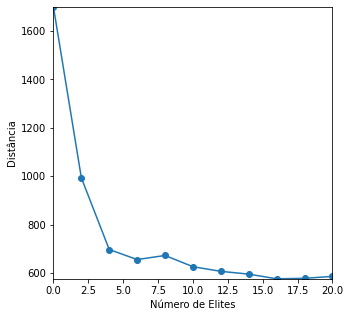

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(taxasElitismo, testesElitismo, 'o-')
plt.xlim(min(taxasElitismo), max(taxasElitismo))
plt.ylim(min(testesElitismo), max(testesElitismo))
plt.xlabel('Número de Elites')
plt.ylabel('Distância')
plt.show()

# Teste 3 - Número de Gerações

In [ ]:
print("Distância com a População Inicial: " + str((int)(1 / avaliarCaminhos(populacaoInicial)[0][1])) + "m")
testesGeracao = []
taxasGeracao = []

for i in range(1, 11):
    pop = algoritmoGenetico(qtdGeracoes=(2**i)*10, taxaMutacao=0.01, qtdElite=10)
    testesGeracao.append(Fitness(pop).calcularDistancia())
    taxasGeracao.append((2**i)*10)

Distância com a População Inicial: 2063m


In [ ]:
idMelhor = testesGeracao.index(min(testesGeracao))
print("Melhor Número de Gerações: " + str(taxasGeracao[idMelhor]))
print("Melhor Distância: " + str(min(testesGeracao)))

Melhor Número de Gerações: 10240
Melhor Distância: 577.158540872025


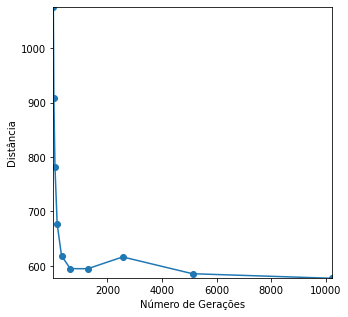

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(taxasGeracao, testesGeracao, 'o-')
plt.xlim(min(taxasGeracao), max(taxasGeracao))
plt.ylim(min(testesGeracao), max(testesGeracao))
plt.xlabel('Número de Gerações')
plt.ylabel('Distância')
plt.show()

# Teste 4 - Melhores Modificadores

In [ ]:
resultado = algoritmoGenetico(qtdGeracoes=1000, taxaMutacao=0.01, qtdElite=16)

In [ ]:
print("Distância com a População Inicial: " + str((int)(1 / avaliarCaminhos(populacaoInicial)[0][1])) + "m")
print("Melhor Distância Encontrada: " + str(Fitness(resultado).calcularDistancia()))

Distância com a População Inicial: 2013m
Melhor Distância Encontrada: 592.8544561812018
